## Introduction

Loan defaulting is a serious problem that affects both lenders and borrowers.Lenders lose money and trust when borrowers fail to repay their loans , while borrowers  suffer from damaged credit scores and legal consequences.Therefore, it is important to predict the likelihood of loan default  and take preventive measures to reduce the risk.
In this project we will use machine learning techniques to build a predictive model for loan default based on data from SuperLender, a local digital lending company.SuperLender uses data driven a data-driven  approach to assess the credit risk of its customers and determine  the two fundermental drivers of repayment; `willingness` and `ability`.We will explore hoiw SuperLender uses machine learning models to predict loan outcomes and evaluate their performance


# Data Understanding

We will make use of the datasets from Zindi, which is the largest professional network for data scientists in Africa.In particular we will be focusing on  3 different datasets for both train and test.

> a) Demographic data
* customerid(primary key)
* birthdate (date of birth of the customer)
* bank_account_type (type of primary bank account)
* latitude_gps / longitude_gps
* bank_name_clients (name of the bank)
* bank_branch_clients(location of the branch)
* employment_status_clients
* level_of_education_clients (highest level of education)

> b) Perfomance data
* customerid(primary key)
* systemloanid(id associated with the particular loan)
* loannumber(number of loan we are predicting)
* approveddate(date loan was approved)
* loan amount
* totaldue
* termdays
* refferedby
* good_bad_flag(good = settled loan on time; bad = did not settled loan on time)

> c) Previous loans data
* customerid
* systemloanid
* loannumber(the number of the loan that we will predict)
* approveddate
* creationdate(date the loan was created)
* loanamount
* totaldue
* closeddate
* refferedby
* firstduedate
* firstpaiddate


## Importing Libraries

In [1]:
# Basic data manipultion and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
# Loading the datasets
train_demographics = pd.read_csv("data/traindemographics.csv")
train_perf = pd.read_csv("data/trainperf.csv")
train_prev_loans = pd.read_csv("data/trainprevloans.csv")
test_demographics = pd.read_csv("data/testdemographics.csv")
test_perf = pd.read_csv("data/testperf.csv")
test_prev_loans = pd.read_csv("data/testprevloans.csv")


## Data Understanding

#### Loading  and previewing the train data

In [3]:
train_demographics.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [4]:
train_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [5]:
train_prev_loans.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [6]:
#checking the shapes of the train data
print (train_demographics.shape)
print (train_perf. shape)
print (train_prev_loans.shape)

(4346, 9)
(4368, 10)
(18183, 12)



#### The `trainperf` and `train_prev_loans` have same columns names. The columns names are renamed by adding `.perf` and `.prev`

In [7]:
columns_to_update = ['systemloanid', 'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby']
train_perf.columns = [col + '.perf' if col in columns_to_update else col for col in train_perf.columns]

train_prev_loans.columns = [col + '.prev' if col in columns_to_update else col for col in train_prev_loans.columns]
print (train_perf. columns)
print(train_prev_loans.columns)

Index(['customerid', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'referredby.perf', 'good_bad_flag'],
      dtype='object')
Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'referredby.prev',
       'firstduedate', 'firstrepaiddate'],
      dtype='object')


### Merging the train data

In [8]:
# Merging the training data using customer id as the key value
train_data = pd.merge(train_prev_loans, train_demographics, on='customerid', how='left')
merged_data = pd.merge(train_data, train_perf, on='customerid', how='left')
merged_data.shape

(18203, 29)

In [9]:
# Displaying the merged data dataset
merged_data.head()

,customerid,systemloanid.prev,loannumber.prev,approveddate.prev,creationdate.prev,loanamount.prev,totaldue.prev,termdays.prev,closeddate,referredby.prev,...,level_of_education_clients,systemloanid.perf,loannumber.perf,approveddate.perf,creationdate.perf,loanamount.perf,totaldue.perf,termdays.perf,referredby.perf,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,...,Post-Graduate,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,...,Post-Graduate,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,...,Post-Graduate,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,...,NaN,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,...,NaN,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good


In [10]:
# checking dataframe columns

print('dataframe columns:',merged_data.columns)

dataframe columns: Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'referredby.prev',
       'firstduedate', 'firstrepaiddate', 'birthdate', 'bank_account_type',
       'longitude_gps', 'latitude_gps', 'bank_name_clients',
       'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'referredby.perf', 'good_bad_flag'],
      dtype='object')


In [11]:
# Getting statistics about the data

print("Stats about the data :", merged_data.describe())

Stats about the data :        systemloanid.prev  loannumber.prev  loanamount.prev  totaldue.prev  \
count       1.820300e+04     18203.000000     18203.000000   18203.000000   
mean        3.018396e+08         4.188211     16498.489260   19570.291924   
std         9.366865e+04         3.248957      9318.978101   10453.446786   
min         3.016001e+08         1.000000      3000.000000    3450.000000   
25%         3.017767e+08         2.000000     10000.000000   11500.000000   
50%         3.018552e+08         3.000000     10000.000000   13000.000000   
75%         3.019197e+08         6.000000     20000.000000   24500.000000   
max         3.020003e+08        26.000000     60000.000000   68100.000000   

       termdays.prev  longitude_gps  latitude_gps  systemloanid.perf  \
count   18203.000000   13693.000000  13693.000000       1.820300e+04   
mean       26.690655       4.482207      7.291442       3.019804e+08   
std        10.950075       8.639590      3.436232       1.342700e+0

In [12]:
#checking info of the data
print(merged_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18203 entries, 0 to 18202
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  18203 non-null  object 
 1   systemloanid.prev           18203 non-null  int64  
 2   loannumber.prev             18203 non-null  int64  
 3   approveddate.prev           18203 non-null  object 
 4   creationdate.prev           18203 non-null  object 
 5   loanamount.prev             18203 non-null  float64
 6   totaldue.prev               18203 non-null  float64
 7   termdays.prev               18203 non-null  int64  
 8   closeddate                  18203 non-null  object 
 9   referredby.prev             1028 non-null   object 
 10  firstduedate                18203 non-null  object 
 11  firstrepaiddate             18203 non-null  object 
 12  birthdate                   13693 non-null  object 
 13  bank_account_type           136

In [13]:
#viewing the dataset info
train_prev_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         18183 non-null  object 
 1   systemloanid.prev  18183 non-null  int64  
 2   loannumber.prev    18183 non-null  int64  
 3   approveddate.prev  18183 non-null  object 
 4   creationdate.prev  18183 non-null  object 
 5   loanamount.prev    18183 non-null  float64
 6   totaldue.prev      18183 non-null  float64
 7   termdays.prev      18183 non-null  int64  
 8   closeddate         18183 non-null  object 
 9   referredby.prev    1026 non-null   object 
 10  firstduedate       18183 non-null  object 
 11  firstrepaiddate    18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [14]:
#describing the dataset
train_prev_loans.describe(include='all')

,customerid,systemloanid.prev,loannumber.prev,approveddate.prev,creationdate.prev,loanamount.prev,totaldue.prev,termdays.prev,closeddate,referredby.prev,firstduedate,firstrepaiddate
count,18183,1.818300e+04,18183.000000,18183,18183,18183.000000,18183.000000,18183.000000,18183,1026,18183,18183
unique,4359,NaN,NaN,18172,18173,NaN,NaN,NaN,17955,521,363,18011
top,8a858f7d5578012a01557ea194d94948,NaN,NaN,2017-04-20 14:00:44.000000,2017-06-12 10:38:36.000000,NaN,NaN,NaN,2016-11-07 00:53:42.000000,8a858fc55b2548dd015b286e452c678c,2017-07-03 00:00:00.000000,2016-08-04 00:00:00.000000
freq,26,NaN,NaN,2,2,NaN,NaN,NaN,5,14,398,7
mean,NaN,3.018395e+08,4.189353,NaN,NaN,16501.237420,19573.202931,26.692790,NaN,NaN,NaN,NaN
std,NaN,9.367767e+04,3.249490,NaN,NaN,9320.547516,10454.245277,10.946556,NaN,NaN,NaN,NaN
min,NaN,3.016001e+08,1.000000,NaN,NaN,3000.000000,3450.000000,15.000000,NaN,NaN,NaN,NaN
25%,NaN,3.017766e+08,2.000000,NaN,NaN,10000.000000,11500.000000,15.000000,NaN,NaN,NaN,NaN
50%,NaN,3.018550e+08,3.000000,NaN,NaN,10000.000000,13000.000000,30.000000,NaN,NaN,NaN,NaN
75%,NaN,3.019197e+08,6.000000,NaN,NaN,20000.000000,24500.000000,30.000000,NaN,NaN,NaN,NaN


In [15]:
train_demographics.describe(include='all')

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,4346,4346,4346,4346.000000,4346.000000,4346,51,3698,587
unique,4334,3297,3,NaN,NaN,18,45,6,4
top,8a858fca5c35df2c015c39ad8695343e,1983-10-19 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate
freq,2,5,3425,NaN,NaN,1598,3,3146,420
mean,NaN,NaN,NaN,4.626189,7.251356,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,7.184832,3.055052,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-118.247009,-33.868818,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.354953,6.470610,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.593302,6.621888,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,6.545220,7.425052,NaN,NaN,NaN,NaN


In [16]:
train_demographics.describe(include='all')

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,4346,4346,4346,4346.000000,4346.000000,4346,51,3698,587
unique,4334,3297,3,NaN,NaN,18,45,6,4
top,8a858fca5c35df2c015c39ad8695343e,1983-10-19 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate
freq,2,5,3425,NaN,NaN,1598,3,3146,420
mean,NaN,NaN,NaN,4.626189,7.251356,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,7.184832,3.055052,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-118.247009,-33.868818,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.354953,6.470610,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.593302,6.621888,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,6.545220,7.425052,NaN,NaN,NaN,NaN


In [17]:
train_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         4368 non-null   object 
 1   systemloanid.perf  4368 non-null   int64  
 2   loannumber.perf    4368 non-null   int64  
 3   approveddate.perf  4368 non-null   object 
 4   creationdate.perf  4368 non-null   object 
 5   loanamount.perf    4368 non-null   float64
 6   totaldue.perf      4368 non-null   float64
 7   termdays.perf      4368 non-null   int64  
 8   referredby.perf    587 non-null    object 
 9   good_bad_flag      4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [18]:
test_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerid    1450 non-null   object 
 1   systemloanid  1450 non-null   int64  
 2   loannumber    1450 non-null   int64  
 3   approveddate  1450 non-null   object 
 4   creationdate  1450 non-null   object 
 5   loanamount    1450 non-null   int64  
 6   totaldue      1450 non-null   float64
 7   termdays      1450 non-null   int64  
 8   referredby    184 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 102.1+ KB


## Test Data

In [19]:
#test shape
print (test_demographics.shape)
print (test_perf. shape)
print (test_prev_loans.shape)

(1487, 9)
(1450, 9)
(5907, 12)


#### Merging the test data

In [20]:
# Merging the testing data
testing_data = pd.merge(test_prev_loans, test_demographics, on='customerid', how='left')
test_data = pd.merge(testing_data, test_perf, on='customerid', how='left')
test_data.shape

(5907, 28)

In [21]:
# Checking the columns
test_data.columns

Index(['customerid', 'systemloanid_x', 'loannumber_x', 'approveddate_x',
       'creationdate_x', 'loanamount_x', 'totaldue_x', 'termdays_x',
       'closeddate', 'referredby_x', 'firstduedate', 'firstrepaiddate',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid_y', 'loannumber_y',
       'approveddate_y', 'creationdate_y', 'loanamount_y', 'totaldue_y',
       'termdays_y', 'referredby_y'],
      dtype='object')

In [22]:
# loading the test data df
test_data

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,closeddate,referredby_x,...,employment_status_clients,level_of_education_clients,systemloanid_y,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,referredby_y
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,...,NaN,NaN,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,...,NaN,NaN,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,...,NaN,NaN,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,NaN,...,Permanent,NaN,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,NaN,...,Permanent,NaN,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,8a858f085b494826015b54a0b2a1093b,301861709,1,2017-04-09 23:04:32.000000,2017-04-09 22:04:10.000000,10000.0,13000.0,30,2017-05-02 22:27:03.000000,8a858e4f5929c3df0159420645f46f55,...,NaN,NaN,301958882,4,21:10.0,21:04.0,20000,24500.0,30,8a858e4f5929c3df0159420645f46f55
5903,8a858f565b683b56015b7391c2617960,301869817,1,2017-04-15 23:33:17.000000,2017-04-15 22:33:05.000000,10000.0,11500.0,15,2017-04-25 19:32:42.000000,NaN,...,NaN,NaN,301978934,3,30:57.0,29:45.0,10000,11500.0,15,NaN
5904,8a858fab5b9105dc015b975e594e394a,301952446,1,2017-06-26 15:46:28.000000,2017-06-26 14:45:20.000000,10000.0,13000.0,30,2017-07-13 13:12:43.000000,NaN,...,NaN,NaN,301976435,2,35:44.0,35:38.0,10000,13000.0,30,NaN
5905,8a858fcf5b39c3ba015b39c7691603e1,301887884,2,2017-05-03 06:56:10.000000,2017-05-03 05:56:04.000000,10000.0,13000.0,30,2017-06-01 22:00:17.000000,NaN,...,NaN,NaN,301959556,4,01:39.0,01:33.0,20000,24500.0,30,NaN


In [23]:
# checking the columns
test_data.columns

Index(['customerid', 'systemloanid_x', 'loannumber_x', 'approveddate_x',
       'creationdate_x', 'loanamount_x', 'totaldue_x', 'termdays_x',
       'closeddate', 'referredby_x', 'firstduedate', 'firstrepaiddate',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid_y', 'loannumber_y',
       'approveddate_y', 'creationdate_y', 'loanamount_y', 'totaldue_y',
       'termdays_y', 'referredby_y'],
      dtype='object')

In [24]:

# checking shape of the test data
test_data.shape

(5907, 28)

# Data Cleaning 
* This section checks for missing values, placeholders, duplicates and data consistency

#### Checking for Missing Values

In [25]:
#Check for missing values in each column
missing_values = merged_data.isnull().sum()

# Calculate the percentage of missing values
percentage_missing_values = (missing_values / len(merged_data)) * 100

# Create a DataFrame to display missing values and percentages
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': percentage_missing_values
})

# Sort the DataFrame by 'Percentage' column in descending order
sorted_missing_data = missing_data_summary.sort_values(by='Percentage', ascending=False)

print("Missing values summary sorted by percentage in descending order:")
print(sorted_missing_data)

Missing values summary sorted by percentage in descending order:
                            Missing Values  Percentage
bank_branch_clients                  18099   99.428666
referredby.prev                      17175   94.352579
referredby.perf                      17175   94.352579
level_of_education_clients           14739   80.970170
employment_status_clients             5873   32.263913
longitude_gps                         4510   24.776136
latitude_gps                          4510   24.776136
bank_account_type                     4510   24.776136
birthdate                             4510   24.776136
bank_name_clients                     4510   24.776136
systemloanid.perf                        0    0.000000
approveddate.perf                        0    0.000000
creationdate.perf                        0    0.000000
loanamount.perf                          0    0.000000
totaldue.perf                            0    0.000000
termdays.perf                            0    0.000000


* `bank_branch_clients`  and `referredby`   have 94% missing values hence they are dropped.   
*  Even though `level_of_education_clients`, `employment_status_clients ` , `longitude_gps` and                          
`latitude_gps`,  `bank_account_type` , `birthdate`, `bank_name_clients` have between 24% and 80% missing values, they are kept as they have important demographic information.

In [26]:
# Dropping columns with missing values as indicated above 
merged_data.drop(columns=['bank_branch_clients', 'referredby.prev', 'referredby.perf'], inplace=True)
                

In [27]:
merged_data.columns

Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'firstduedate',
       'firstrepaiddate', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'good_bad_flag'],
      dtype='object')

### Check for  Row Duplicates

In [28]:
duplicates = merged_data.duplicated(keep=False).sum()
print("Number of duplicated rows in merged_data:", duplicates)

Number of duplicated rows in merged_data: 40


## Dropping duplicates 

In [29]:
merged_data.drop_duplicates(inplace=True)

### Check for Data Consistency and Placeholders 

In [30]:
for column in merged_data.columns:
        
        unique_values = merged_data[column].unique()
        placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', 'none']]
        placeholder_count = len(placeholders)    
        unique_value_counts = merged_data[column].value_counts()    
        print(f"Column: '{column}'")
        print(f"Unique value counts:")
        print(unique_value_counts)
        print()
        print(f"Placeholders:")
        print(placeholders)
        print(f"Count of placeholders: {placeholder_count}\n")

Column: 'customerid'
Unique value counts:
8a858f7d5578012a01557ea194d94948    26
8a858e4456ced8470156d73452f85335    22
8a858899538ddb8e0153a780c56e34bb    21
8a85886f54517ee0015470749d3c3ce7    21
8a858fe5569398920156a3a9a77b5d02    21
                                    ..
8a858f7e5c69a6e3015c779b5d6c03b8     1
8a858e165cf9d8e3015d072f06823b83     1
8a858e655b903189015b903875da03da     1
8a858f025bd49f21015bd8590bd83fe8     1
8a858f0656b7820c0156c92ca3ba436f     1
Name: customerid, Length: 4359, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'systemloanid.prev'
Unique value counts:
301682320    1
301754669    1
301884544    1
301829670    1
301923724    1
            ..
301607463    1
301836166    1
301609879    1
301899120    1
301715255    1
Name: systemloanid.prev, Length: 18183, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'loannumber.prev'
Unique value counts:
1     4344
2     2969
3     2300
4     1860
5     1535
6     1288
7     1036
8    

* The data does not have placeholders and there is consistency in the columns


##  Exploratory Data Analysis

#### Univariate Analysis

#### Setting up custom configuration settings for Matplotlib and Seaborn to control the appearance and style of plots

In [31]:

# settings for all images
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "figure.figsize": (9.7, 6.27),
}
sns.set_theme(style="white", palette=None, rc=custom_params)
sns.set_context("notebook", font_scale=1.0)

In [32]:
def pie(col, ax):
    data = col.value_counts().values
    lab = col.value_counts().index
    name = col.name
    ax.pie(data, autopct='%.0f%%')
    ax.set_title(f'{name} piechart')
    ax.legend(lab, bbox_to_anchor=(1, 1));

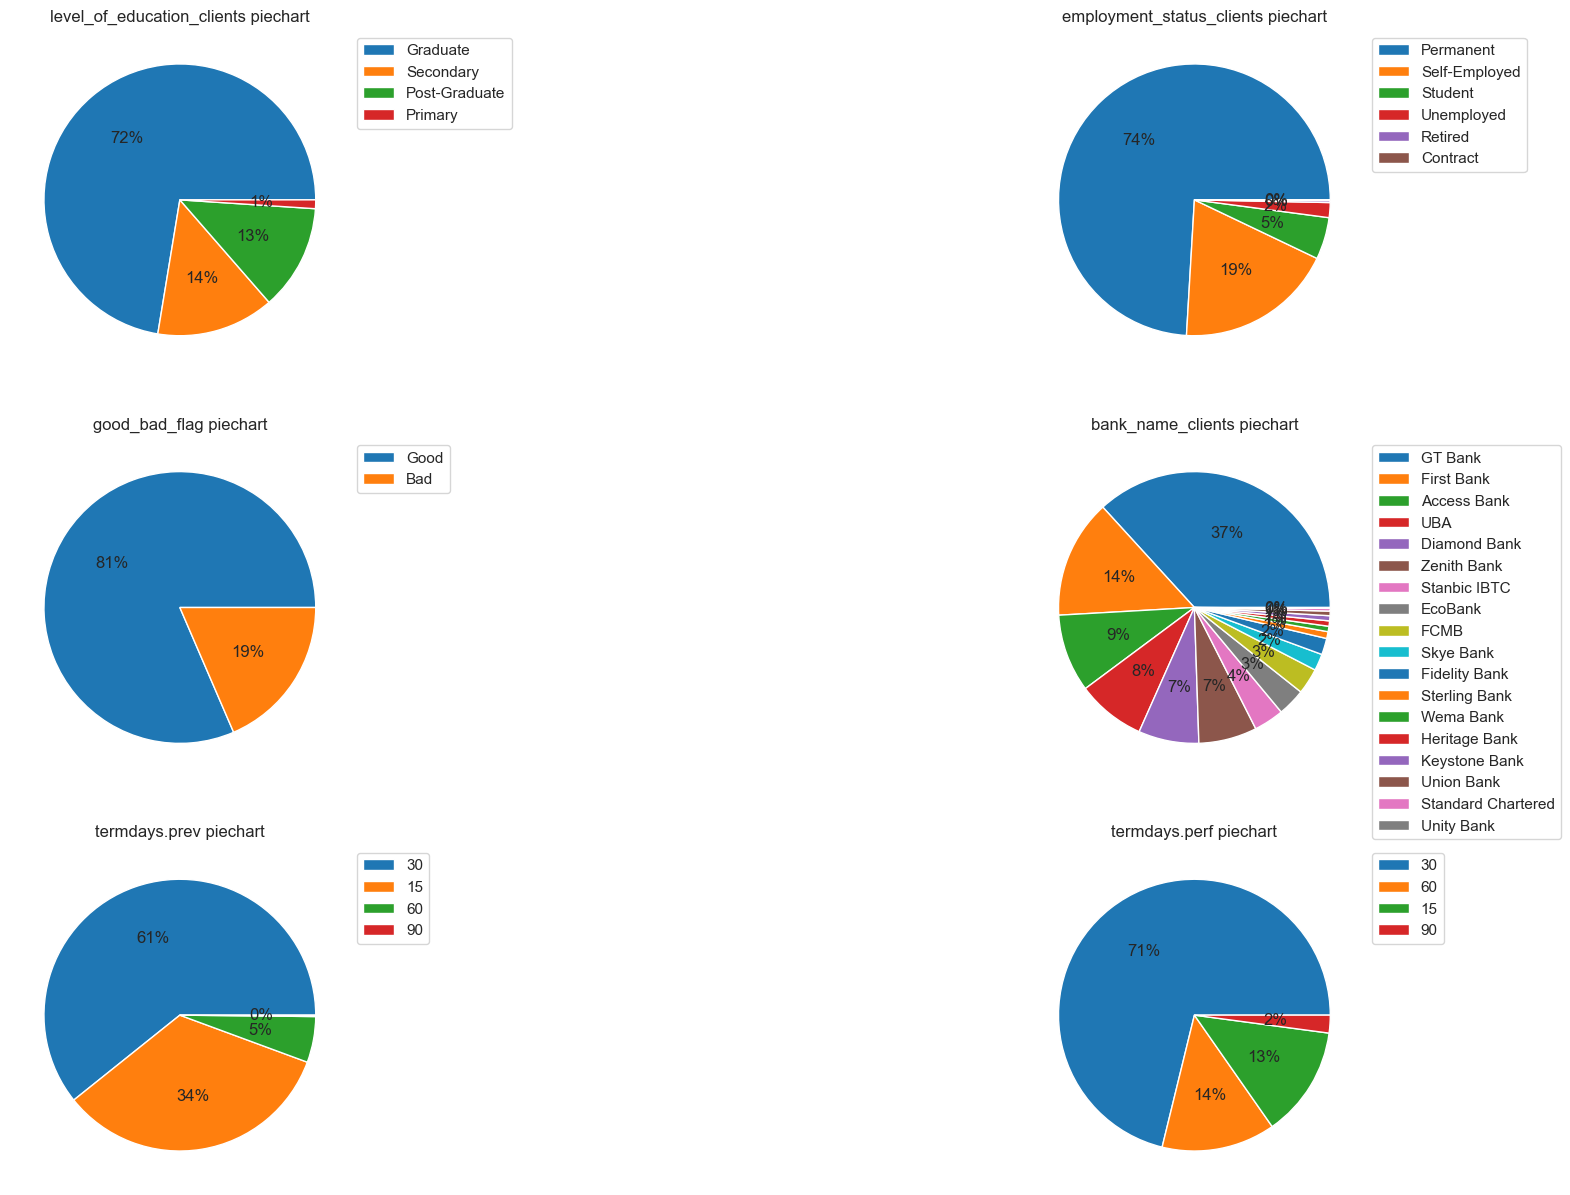

In [33]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(24, 15))
pie_cols = ['level_of_education_clients', 'employment_status_clients', 'good_bad_flag', 'bank_name_clients', 'termdays.prev', 'termdays.perf']
for i, ax in enumerate(axs.flatten()):
    pie(merged_data[pie_cols[i]], ax)

#### Distribution of numeric variables

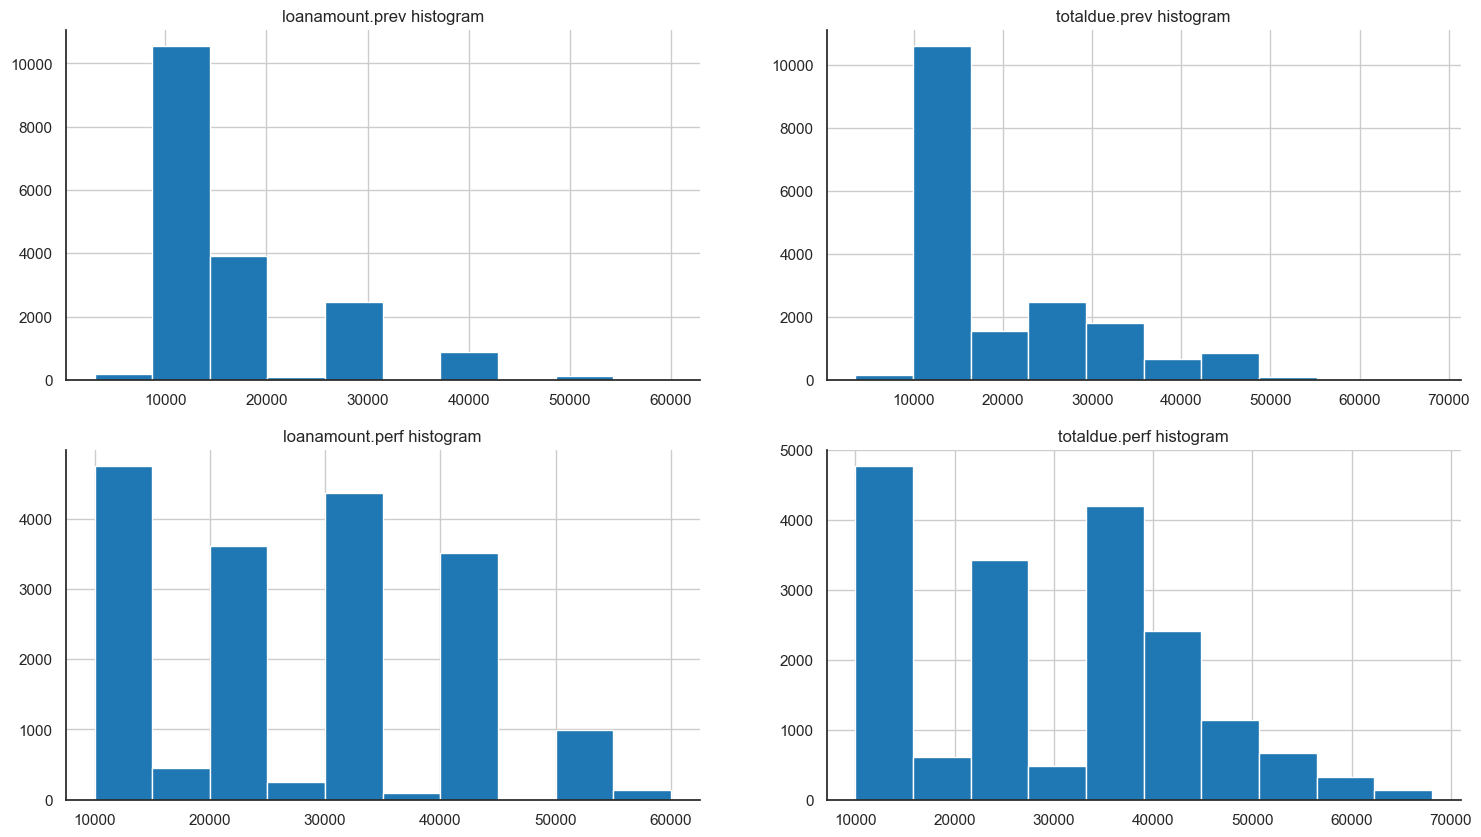

In [34]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(18, 10))
hist_cols = ['loanamount.prev', 'totaldue.prev', 'loanamount.perf', 'totaldue.perf']
for i, ax in enumerate(axs.flatten()):
    merged_data[hist_cols[i]].hist(ax=ax)
    ax.set_title(f'{hist_cols[i]} histogram')

#### Distribution of customers

In [35]:
import plotly.express as px

fig = px.scatter_mapbox(merged_data, lat='latitude_gps', lon='longitude_gps', zoom=10)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=10,  
    mapbox_center={"lat": merged_data['latitude_gps'].mean(), "lon": merged_data['longitude_gps'].mean()}  # Center the map around the data
)
fig.show()

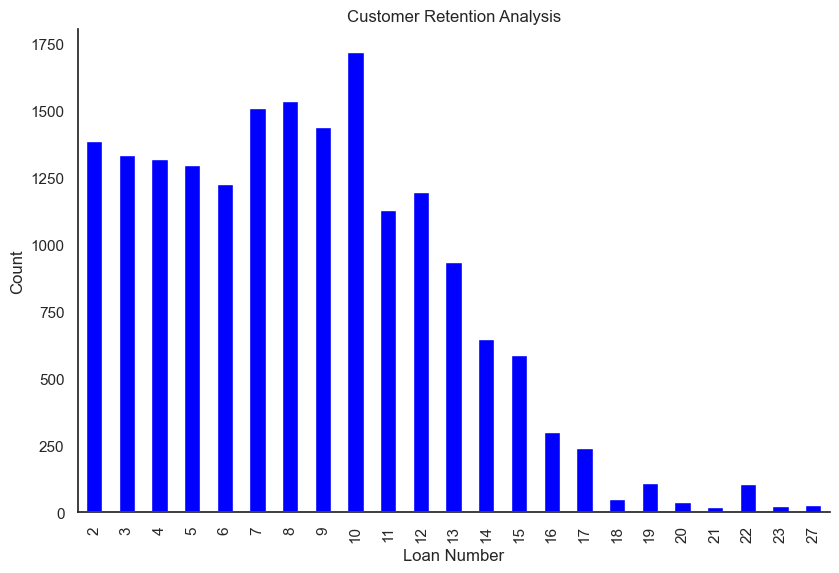

In [36]:
# Calculate customer retention
merged_data['retention'] = merged_data.groupby('customerid')['loannumber.perf'].transform('max')

# Countplot of customer retention
pd.crosstab(merged_data['loannumber.perf'], merged_data['retention']).plot(kind='bar', stacked=True, color='blue', legend=None)
plt.xlabel('Loan Number')
plt.ylabel('Count')
plt.title('Customer Retention Analysis')
plt.show()

* Customer Retention Analysis assesses the longevity of customer relationships with the loan service
*  Customers taking a loans from 2 to 12 indicate a strong relationship with the loan service since during this period customers return for multiple loans.
* The decrease in customer numbers after loan number 12 could be due to:
    1. Customers may have fulfilled their borrowing needs.
    2. Customers may have reached their credit limits that prevents them from taking out more loans
    3. Some customers may have been lost due to changing financial circumstances, or dissatisfaction with the service

#### Distribution of customers in different banks

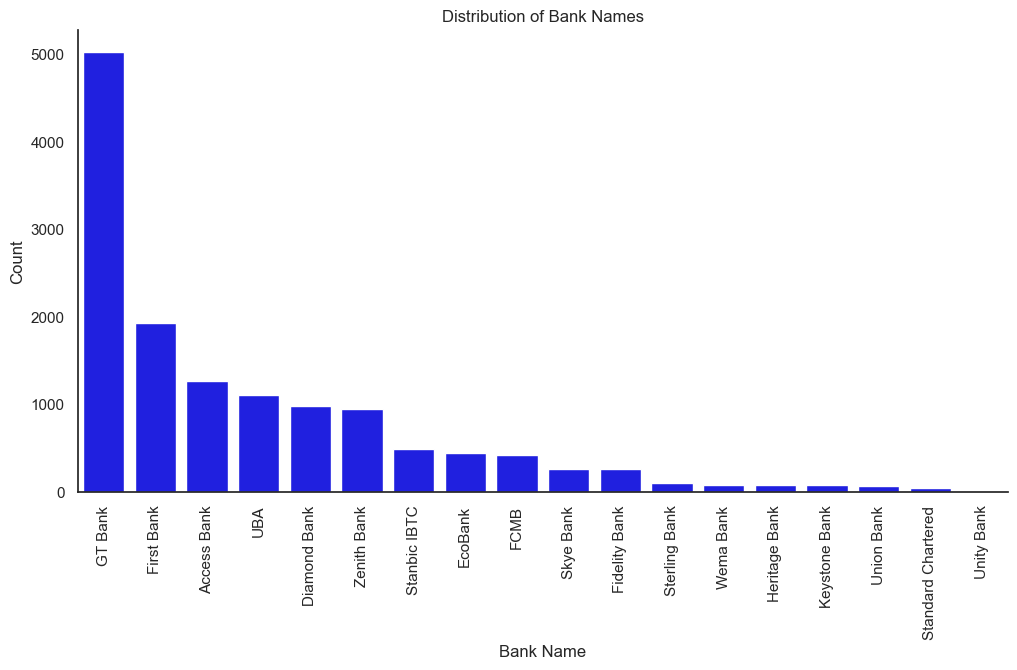

In [37]:
# Distribution of customers among different banks.
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, x='bank_name_clients',color='blue', order=merged_data['bank_name_clients'].value_counts().index)
plt.xlabel('Bank Name')
plt.ylabel('Count')
plt.title('Distribution of Bank Names')
plt.xticks(rotation=90)
plt.show()

### Bivariate EDA

Display of loan default rate

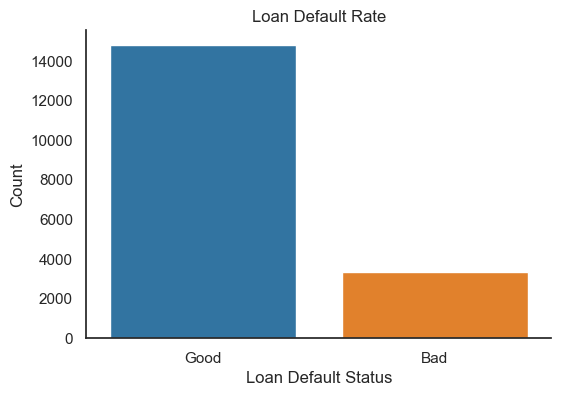

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_data, x='good_bad_flag')
plt.xlabel('Loan Default Status')
plt.ylabel('Count')
plt.title('Loan Default Rate')
plt.show()

#### Creating a contingency table of employment status and loan repayment status

In [39]:
cross_tab = pd.crosstab(merged_data['employment_status_clients'], merged_data['good_bad_flag'])
print(cross_tab)

good_bad_flag               Bad  Good
employment_status_clients            
Contract                      0    10
Permanent                  1646  7472
Retired                       0    29
Self-Employed               347  1972
Student                     140   475
Unemployed                   40   179


<Figure size 1500x1000 with 0 Axes>

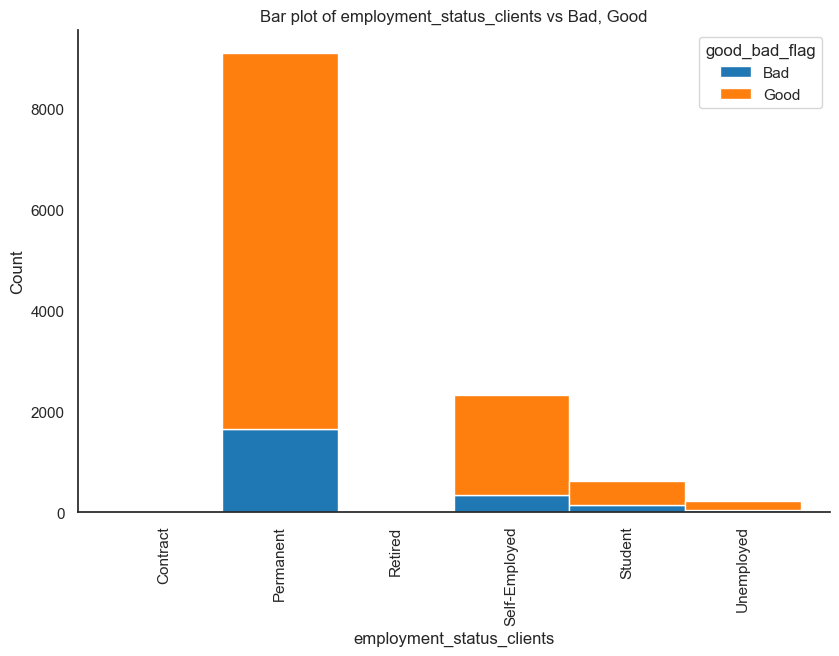

In [40]:
def plot_crosstab(crosstab):
    # Create a bar plot
    plt.figure(figsize=(15, 10))
    # Use width=1 to make the bars touch each other
    crosstab.plot(kind='bar', stacked=True, width=1)

    # Add labels and title
    plt.xlabel(crosstab.index.name)
    plt.ylabel('Count')
    plt.title('Bar plot of ' + crosstab.index.name + ' vs ' + ', '.join([str(x) for x in crosstab.columns]))

    # Show the plot
    plt.show()

# merged_data  as the dataframe 
cross_tab = pd.crosstab(merged_data['employment_status_clients'], merged_data['good_bad_flag'])
plot_crosstab(cross_tab)


Mean loan amount by loan performance:
good_bad_flag
Bad     22790.973872
Good    26316.571043
Name: loanamount.perf, dtype: float64
Mean term days by loan performance:
good_bad_flag
Bad     33.852435
Good    33.228822
Name: termdays.perf, dtype: float64
Cross-tabulation of employment status and loan performance:
good_bad_flag              Bad  Good
employment_status_clients           
Contract                    0%  100%
Permanent                  18%   81%
Retired                     0%  100%
Self-Employed              14%   85%
Student                    22%   77%
Unemployed                 18%   81%
Cross-tabulation of level of education and loan performance:
good_bad_flag               Bad Good
level_of_education_clients          
Graduate                    16%  83%
Post-Graduate               20%  79%
Primary                      2%  97%
Secondary                   24%  75%


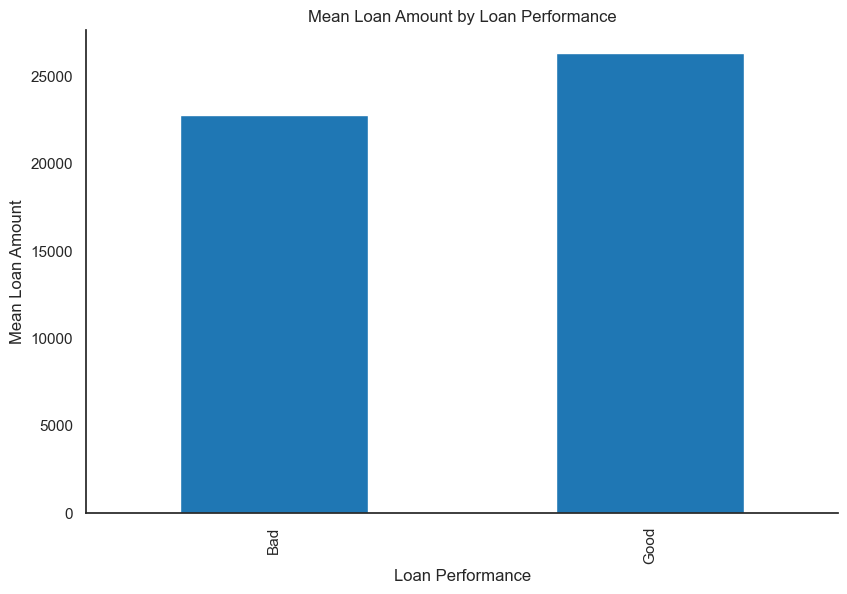

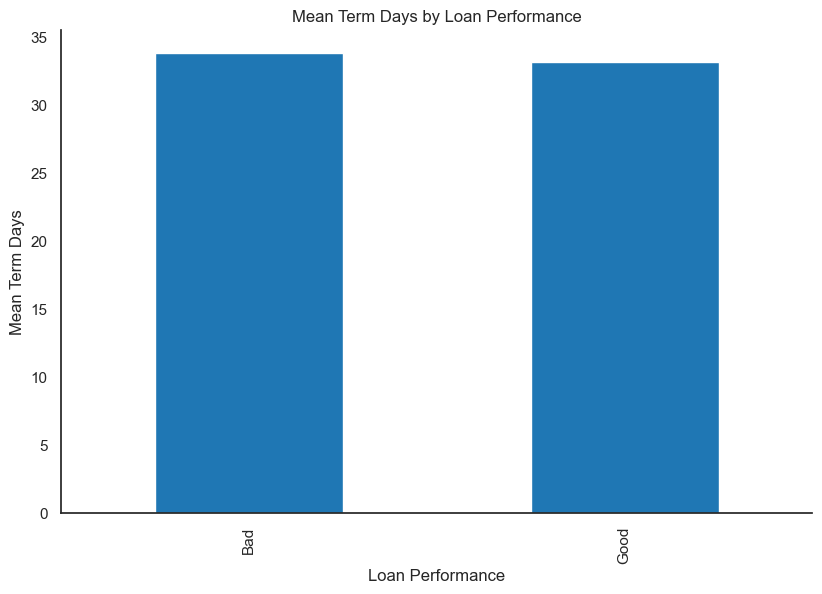

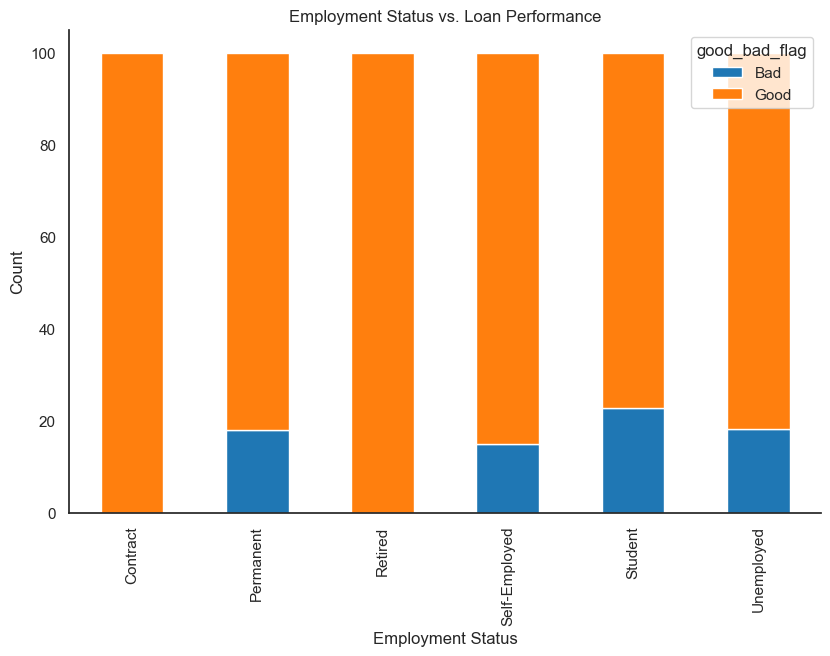

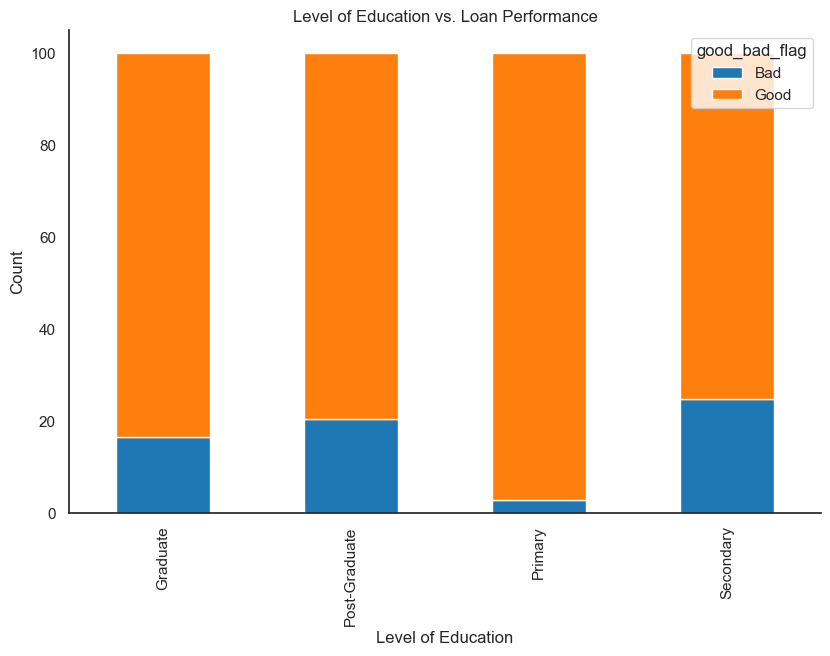

In [41]:
# Calculate the mean loan amount and term days for each group
mean_loan_amount = merged_data.groupby("good_bad_flag")["loanamount.perf"].mean()
mean_term_days = merged_data.groupby("good_bad_flag")["termdays.perf"].mean()

# Print the results
print("Mean loan amount by loan performance:")
print(mean_loan_amount)
print("Mean term days by loan performance:")
print(mean_term_days)

# Create a cross-tabulation table for employment status and loan performance with percentages
ct_employment = pd.crosstab(merged_data["employment_status_clients"], merged_data["good_bad_flag"], normalize="index") * 100

# Format the percentages with percentage signs and no decimal places
ct_employment_formatted = ct_employment.applymap(lambda x: f'{int(x)}%')

# Print the results with formatted percentages
print("Cross-tabulation of employment status and loan performance:")
print(ct_employment_formatted)

# Create a cross-tabulation table for level of education and loan performance with percentages
ct_education = pd.crosstab(merged_data["level_of_education_clients"], merged_data["good_bad_flag"], normalize="index") * 100

# Format the percentages with percentage signs and no decimal places
ct_education_formatted = ct_education.applymap(lambda x: f'{int(x)}%')

# Print the results with formatted percentages
print("Cross-tabulation of level of education and loan performance:")
print(ct_education_formatted)

# visualizations
def visualize_data(mean_loan_amount, mean_term_days, ct_employment, ct_education):
    # Mean Loan Amount
    mean_loan_amount.plot(kind='bar', title="Mean Loan Amount by Loan Performance")
    plt.xlabel("Loan Performance")
    plt.ylabel("Mean Loan Amount")
    plt.show()

    # Mean Term Days
    mean_term_days.plot(kind='bar', title="Mean Term Days by Loan Performance")
    plt.xlabel("Loan Performance")
    plt.ylabel("Mean Term Days")
    plt.show()

    # Cross-Tabulation of Employment Status
    ct_employment.plot(kind='bar', stacked=True, title="Employment Status vs. Loan Performance")
    plt.xlabel("Employment Status")
    plt.ylabel("Count")
    plt.show()

    # Cross-Tabulation of Level of Education
    ct_education.plot(kind='bar', stacked=True, title="Level of Education vs. Loan Performance")
    plt.xlabel("Level of Education")
    plt.ylabel("Count")
    plt.show()

# Assuming you have already calculated mean_loan_amount, mean_term_days, ct_employment, and ct_education
visualize_data(mean_loan_amount, mean_term_days, ct_employment, ct_education)



from the above analysis we found out that;
   - Employment status appears to be a significant factor in loan performance. Contract and permanent employees are more likely to have a "Good" loan performance, while retirees and unemployed customers tend to have a "Bad" loan performance.
   - Level of education also plays a role, with customers holding a "Primary" education having the highest likelihood of a "Good" loan performance.
   - Higher mean loan amounts do not necessarily correlate with "Bad" loan performance, indicating that loan amount alone is not a strong predictor of loan performance.

### Visualizing and measuring the relationship between previous and current loan amounts

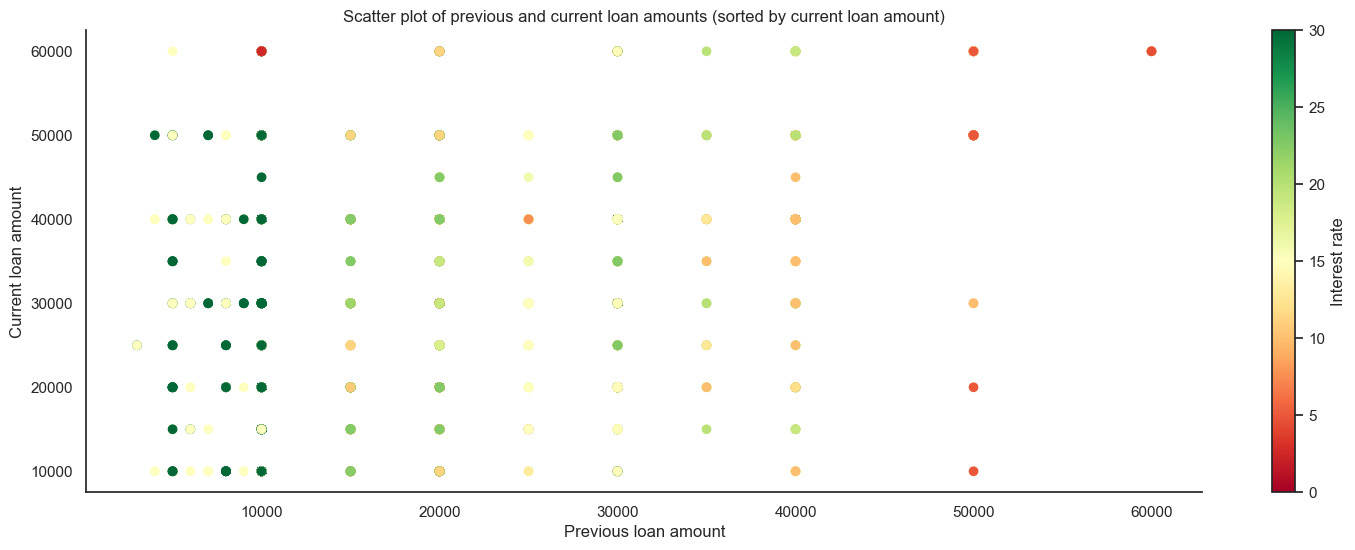

The correlation coefficient between previous and current loan amounts is 0.57


In [42]:

# Create interest_rate column using totaldue.prev and loanamount.prev
merged_data["interest_rate"] = (merged_data["totaldue.prev"] - merged_data["loanamount.prev"]) / merged_data["loanamount.prev"] * 100

# Scatter plot
plt.figure(figsize=(18,6))

# Sort the dataframe by current loan amount in descending order
sorted_data = merged_data.sort_values(by="loanamount.perf", ascending=False)

# Plot the scatter plot using the sorted dataframe
plt.scatter(sorted_data["loanamount.prev"], sorted_data["loanamount.perf"], c=sorted_data["interest_rate"], cmap="RdYlGn")
plt.xlabel("Previous loan amount")
plt.ylabel("Current loan amount")
plt.title("Scatter plot of previous and current loan amounts (sorted by current loan amount)")
plt.colorbar(label="Interest rate")
plt.show()

# Correlation coefficient
corr = np.corrcoef(sorted_data["loanamount.prev"], sorted_data["loanamount.perf"])[0,1]
print(f"The correlation coefficient between previous and current loan amounts is {corr:.2f}")

the interest rate charged on a loan reflects the implied probability of default, assuming a zero recovery rate.This means that the higher the interest rate, the higher the risk of default that the lender expects.


The red points indicate high interest rates and high risk of default, while the green points indicate low interest rates and low risk of default.
We can see that there is a negative correlation between the previous and current loan amounts and the interest rate, meaning that borrowers who have larger loans tend to have lower interest rates and lower risk of default.



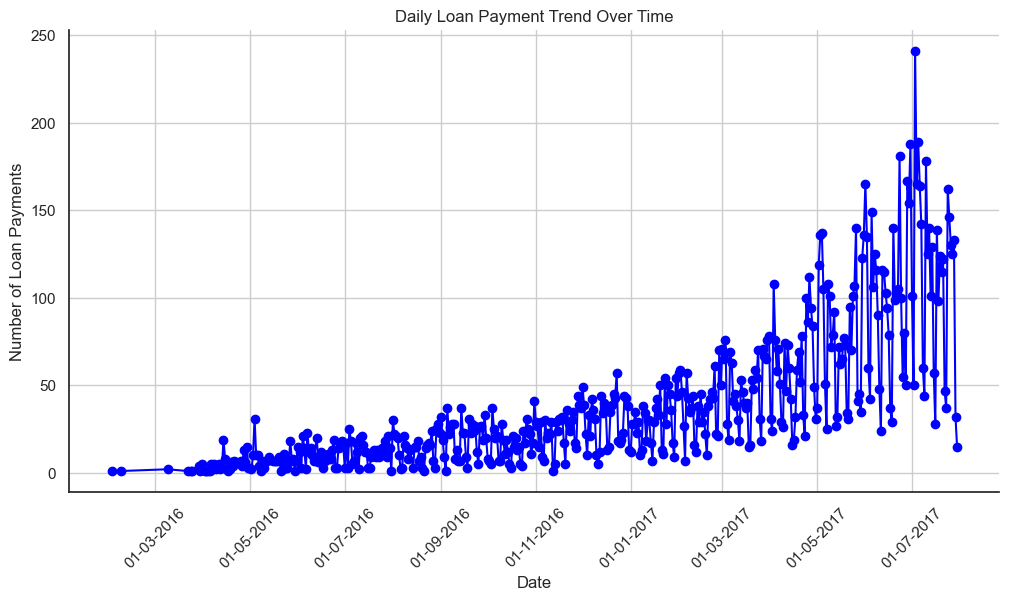

In [43]:
#Convert date columns to datetime objects
date_columns = ['firstduedate', 'firstrepaiddate'] 
for col in date_columns: merged_data[col] = pd.to_datetime(merged_data[col])

#Create a new column called ‘date’ that contains only the date part of ‘firstrepaiddate’
merged_data['date'] = merged_data['firstrepaiddate'].dt.date

#Group data by date and count the number of loan payments
daily_payment_counts = merged_data.groupby('date')['firstrepaiddate'].count().reset_index()

#Create a time series line plot
plt.figure(figsize=(12, 6))

#Convert pandas series to numpy arrays before plotting
plt.plot(daily_payment_counts['date'].values, daily_payment_counts['firstrepaiddate'].values, marker='o', linestyle='-', color='b')
plt.title('Daily Loan Payment Trend Over Time')
plt.xlabel('Date') 
plt.ylabel('Number of Loan Payments') 
plt.grid(True)
#Format the x-axis labels as day, month, and year
myFmt = mdates.DateFormatter('%d-%m-%Y') 
plt.gca().xaxis.set_major_formatter(myFmt) 
plt.xticks(rotation=45)

plt.show()

- From the graph we conclude that their is an increase in trend in monthly loan repayment overtime most loans are bieng repayed over the course of the month

## Data preprocessing

In [44]:
# Checking for missing values
merged_data.isna().sum()

customerid                        0
systemloanid.prev                 0
loannumber.prev                   0
approveddate.prev                 0
creationdate.prev                 0
loanamount.prev                   0
totaldue.prev                     0
termdays.prev                     0
closeddate                        0
firstduedate                      0
firstrepaiddate                   0
birthdate                      4510
bank_account_type              4510
longitude_gps                  4510
latitude_gps                   4510
bank_name_clients              4510
employment_status_clients      5873
level_of_education_clients    14719
systemloanid.perf                 0
loannumber.perf                   0
approveddate.perf                 0
creationdate.perf                 0
loanamount.perf                   0
totaldue.perf                     0
termdays.perf                     0
good_bad_flag                     0
retention                         0
interest_rate               

In [45]:
# Dropping rows with missing values

merged_data.dropna(axis=0,inplace=True)
merged_data.isna().sum()


customerid                    0
systemloanid.prev             0
loannumber.prev               0
approveddate.prev             0
creationdate.prev             0
loanamount.prev               0
totaldue.prev                 0
termdays.prev                 0
closeddate                    0
firstduedate                  0
firstrepaiddate               0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
systemloanid.perf             0
loannumber.perf               0
approveddate.perf             0
creationdate.perf             0
loanamount.perf               0
totaldue.perf                 0
termdays.perf                 0
good_bad_flag                 0
retention                     0
interest_rate                 0
date                          0
dtype: int64

In [46]:
#Calculating the age of the customers
#Importing the relevant column
from datetime import datetime

merged_data['birthdate'] = pd.to_datetime(merged_data['birthdate'])
merged_data['approveddate.perf'] = pd.to_datetime(merged_data['approveddate.perf'])

#Use the dt.year attribute to calculate the age in years
merged_data['age'] = merged_data['approveddate.perf'].dt.year - merged_data['birthdate'].dt.year 
merged_data.head()

,customerid,systemloanid.prev,loannumber.prev,approveddate.prev,creationdate.prev,loanamount.prev,totaldue.prev,termdays.prev,closeddate,firstduedate,...,approveddate.perf,creationdate.perf,loanamount.perf,totaldue.perf,termdays.perf,good_bad_flag,retention,interest_rate,date,age
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,2016-09-14,...,2017-07-25 08:22:56,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,12,30.0,2016-09-01,45
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,2017-05-30,...,2017-07-25 08:22:56,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,12,30.0,2017-05-26,45
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,2017-04-04,...,2017-07-25 08:22:56,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,12,19.0,2017-04-26,45
5,8a858970548359cc0154883481981866,301832407,5,2017-03-06 13:25:17.000000,2017-03-06 12:25:10.000000,20000.0,23800.0,30,2017-04-04 15:46:56.000000,2017-04-05,...,2017-07-03 23:42:45,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good,9,19.0,2017-04-04,31
6,8a858970548359cc0154883481981866,301926513,8,2017-06-04 01:00:23.000000,2017-06-04 00:00:16.000000,30000.0,39000.0,60,2017-07-03 23:35:38.000000,2017-07-04,...,2017-07-03 23:42:45,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good,9,30.0,2017-07-03,31


In [47]:
merged_data.columns

Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'firstduedate',
       'firstrepaiddate', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'good_bad_flag', 'retention',
       'interest_rate', 'date', 'age'],
      dtype='object')

In [48]:
# Convert date columns to datetime objects
date_columns = ['approveddate.prev', 'creationdate.prev', 'approveddate.perf', 'creationdate.perf']
for col in date_columns:
    merged_data[col] = pd.to_datetime(merged_data[col], format='%Y-%m-%d %H:%M:%S.%f')

# Calculate time differences and convert to minutes
merged_data['time_to_approval.prev'] = (merged_data['approveddate.prev'] - merged_data['creationdate.prev']).dt.total_seconds() / 60
merged_data['time_to_approval.perf'] = (merged_data['approveddate.perf'] - merged_data['creationdate.perf']).dt.total_seconds() / 60

### Dropping irrelevant columns for my analysis

In [49]:
columns_to_drop = ['longitude_gps','latitude_gps','approveddate.prev','customerid','systemloanid.prev','systemloanid.perf',
                          'approveddate.perf','level_of_education_clients', 'birthdate','closeddate','date','creationdate.prev', 'firstduedate', 'firstrepaiddate', 'creationdate.perf']


merged_data.drop(columns=columns_to_drop, inplace=True)

I dropped the above columns because;

    - customerid: This is a unique identifier for each customer, which does not have any predictive power for the loan default probability.
systemloanid.prev and systemloanid.perf: These are also unique identifiers for each loan, which do not have any predictive power for the loan default probability.

    - approveddate.prev and approveddate.perf: These are the dates when the previous and current loans were approved, which do not have any direct impact on the loan default probability. You can use the creationdate.prev and creationdate.perf columns instead, which capture the time difference between the loans.

    - closeddate: This is the date when the previous loan was closed, which does not have any direct impact on the loan default probability. You can use the firstrepaiddate column instead, which captures the repayment status of the previous loan.

    - *birthdate*: This is the date of birth of the customer, which does not have any direct impact on the loan default probability. You can use the age column instead, which captures the age of the customer in years.

    - *longitude_gps and latitude_gps*: These are the geographical coordinates of the customer, which do not have any direct impact on the loan default probability. You can use other features that capture the location of the customer, such as bank name clients or employment status clients.
    
    - *level_of_education_clients*: This is the level of education of the customer, which does not have any direct impact on the loan default probability. You can use other features that capture the financial status of the customer, such as bank account type or income.

### One hot encoding categorical variables

In [50]:
df_with_dummies = pd.get_dummies(merged_data,drop_first=True)
df_with_dummies.head()

,loannumber.prev,loanamount.prev,totaldue.prev,termdays.prev,loannumber.perf,loanamount.perf,totaldue.perf,termdays.perf,retention,interest_rate,...,bank_name_clients_Sterling Bank,bank_name_clients_UBA,bank_name_clients_Union Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,good_bad_flag_Good
0,2,10000.0,13000.0,30,12,30000.0,34500.0,30,12,30.0,...,0,0,0,0,0,0,0,0,0,1
1,9,10000.0,13000.0,30,12,30000.0,34500.0,30,12,30.0,...,0,0,0,0,0,0,0,0,0,1
2,8,20000.0,23800.0,30,12,30000.0,34500.0,30,12,19.0,...,0,0,0,0,0,0,0,0,0,1
5,5,20000.0,23800.0,30,9,40000.0,44000.0,30,9,19.0,...,0,0,0,0,0,0,0,0,0,1
6,8,30000.0,39000.0,60,9,40000.0,44000.0,30,9,30.0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
# Replace True with 1 and False with 0 for all columns
df_with_dummies = df_with_dummies.applymap(lambda x: 1 if x == True else (0 if x == False else x))

# Check the DataFrame after transformation
print(df_with_dummies.head())


   loannumber.prev  loanamount.prev  totaldue.prev  termdays.prev  \
0                2          10000.0        13000.0             30   
1                9          10000.0        13000.0             30   
2                8          20000.0        23800.0             30   
5                5          20000.0        23800.0             30   
6                8          30000.0        39000.0             60   

   loannumber.perf  loanamount.perf  totaldue.perf  termdays.perf  retention  \
0               12          30000.0        34500.0             30         12   
1               12          30000.0        34500.0             30         12   
2               12          30000.0        34500.0             30         12   
5                9          40000.0        44000.0             30          9   
6                9          40000.0        44000.0             30          9   

   interest_rate  ...  bank_name_clients_Sterling Bank  bank_name_clients_UBA  \
0           30.0  ...  

In [52]:
# checking the  distribution of the target variable
df_with_dummies['good_bad_flag_Good'].value_counts()

1    2830
0     620
Name: good_bad_flag_Good, dtype: int64

The target variable good_bad_flag seems to be imbalanced, with many more instances of class 1 (2830) than class 0 (620). Imbalanced data can lead to biased model performance.

In [53]:
df_with_dummies.columns

Index(['loannumber.prev', 'loanamount.prev', 'totaldue.prev', 'termdays.prev',
       'loannumber.perf', 'loanamount.perf', 'totaldue.perf', 'termdays.perf',
       'retention', 'interest_rate', 'age', 'time_to_approval.prev',
       'time_to_approval.perf', 'bank_account_type_Other',
       'bank_account_type_Savings', 'bank_name_clients_Diamond Bank',
       'bank_name_clients_EcoBank', 'bank_name_clients_FCMB',
       'bank_name_clients_Fidelity Bank', 'bank_name_clients_First Bank',
       'bank_name_clients_GT Bank', 'bank_name_clients_Heritage Bank',
       'bank_name_clients_Keystone Bank', 'bank_name_clients_Skye Bank',
       'bank_name_clients_Stanbic IBTC',
       'bank_name_clients_Standard Chartered',
       'bank_name_clients_Sterling Bank', 'bank_name_clients_UBA',
       'bank_name_clients_Union Bank', 'bank_name_clients_Wema Bank',
       'bank_name_clients_Zenith Bank', 'employment_status_clients_Retired',
       'employment_status_clients_Self-Employed',
       'empl

### Handling class imbalance

In [55]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)

# Separate the features and target variable
X = df_with_dummies.drop('good_bad_flag_Good', axis=1)  # Features
y = df_with_dummies['good_bad_flag_Good']  # Target variable

# Apply SMOTE to balance the classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts())

1    2830
0    2830
Name: good_bad_flag_Good, dtype: int64


## LOGISTIC REGRESSION

In [65]:
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=42)

print('completed splitting data')


# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test )

# Feature selection
selector = SelectKBest(f_classif, k=30)
X_train = selector.fit_transform(X_train, y_train)
X_test =selector.transform(X_test)



# instantiating Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg

# Predictions
y_hat_test = logreg.predict(X_test)

y_hat_train = logreg.predict(X_train)

# Model Evaluation
y_train_pred = logreg.predict(X_train)

y_test_pred = logreg.predict(X_test)

print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))





completed splitting data
Training Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      2014
           1       0.66      0.76      0.70      1948

    accuracy                           0.69      3962
   macro avg       0.69      0.69      0.69      3962
weighted avg       0.69      0.69      0.69      3962

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       816
           1       0.68      0.78      0.72       882

    accuracy                           0.69      1698
   macro avg       0.70      0.69      0.69      1698
weighted avg       0.69      0.69      0.69      1698



c:\Users\Derrick Masungo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [25] are constant.

c:\Users\Derrick Masungo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide



The model shows reasonably balanced performance with similar accuracy, precision, recall, and F1-scores on both the training and testing datasets. This suggests that the model is not overfitting to the training data and generalizes well to the testing data.
The macro average and weighted average metrics provide summary statistics across classes. The macro average calculates the metric for each class and takes the unweighted mean, while the weighted average considers class imbalance. In this case, they are close to the class-specific metrics, indicating a roughly balanced dataset.

In [66]:

#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=42)

print('completed splitting data')


# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test )

# Feature selection
selector = SelectKBest(f_classif, k='all')
X_train = selector.fit_transform(X_train, y_train)
X_test =selector.transform(X_test)



# instantiating Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg

# Predictions
y_hat_test = logreg.predict(X_test)

y_hat_train = logreg.predict(X_train)

# Model Evaluation
y_train_pred = logreg.predict(X_train)

y_test_pred = logreg.predict(X_test)

print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))





completed splitting data
Training Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.62      0.68      2014
           1       0.67      0.78      0.72      1948

    accuracy                           0.70      3962
   macro avg       0.71      0.70      0.70      3962
weighted avg       0.71      0.70      0.70      3962

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.61      0.67       816
           1       0.69      0.80      0.74       882

    accuracy                           0.71      1698
   macro avg       0.71      0.70      0.70      1698
weighted avg       0.71      0.71      0.70      1698



c:\Users\Derrick Masungo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [25] are constant.

c:\Users\Derrick Masungo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide



the logistic regression model has been significantly improved, providing a better trade-off between precision and recall. It performs reasonably well, but further enhancements may be possible by exploring additional feature engineering, different algorithms, or fine-tuning hyperparameters.